**Lab-07 Decision Tree and Random Forest**

Ở Bài thực hành này chúng ta sẽ tiến hành làm quen với thư viện sklearn thuật toán Decision Tree với các Parameters như max_depth, max_features...

*Thuật toán Random Forest
1. Lấy ngẫu nhiên $n$ dữ liệu từ bộ dữ liệu với kĩ thuật Bootstrapping, hay còn gọi là random sampling with replacement. Tức là chúng ta sẽ lấy mẫu một số dữ liệu từ tập dữ liệu ban đầu. Khi dùng kĩ thuật này thì tập n dữ liệu mới của mình có thể có những dữ liệu bị trùng nhau.
2. Sau khi sample được n dữ liệu từ bước 1 thì mình chọn ngẫu nhiên k thuộc tính ($k$ < $m$, $m$ là số features). Giờ mình được bộ dữ liệu mới gồm n dữ liệu và mỗi dữ liệu có k thuộc tính.
3. Dùng thuật toán Decision Tree để xây dựng cây quyết định với bộ dữ liệu ở bước 2.
4. Sau khi có $n$ kết quả ta tiến hành voting, kết quả dự đoán của thuật toán Random Forest sẽ được tổng hợp từ các cây quyết định này.


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-07/bt1.csv", header=None)

In [ ]:
df.shape

(1728, 7)

In [ ]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Data trong bài thực hành này gồm 7 features, từ 0 đến 6, do đó ta đặt tên lại cho từng feature

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
#Check xem có feature nào có null không
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
# Chia ra tập training và tập testing
X = df.drop(['class'], axis=1)

y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [ ]:
!pip install category_encoders 

In [ ]:
#convert các feature từ string sang int
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
#check type 
X_train.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
dtype: object

In [ ]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0, max_features=None) 
#max_feature=None nghĩa lấy hết các features
#max_depth là độ sâu của cây 
#criterion là chọn phương pháp để đánh giá khi phân chia nhánh, trong lý thuyết mình chỉ được học entropy 

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
accuracy = clf_gini.score(X_test,y_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy))

Model accuracy score with criterion gini index: 0.8021


In [ ]:
#Check accuracy trên tập training để xem model có bị overfitting hay không
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(clf_gini.score(X_train,y_train)))

Training-set accuracy score: 0.7865


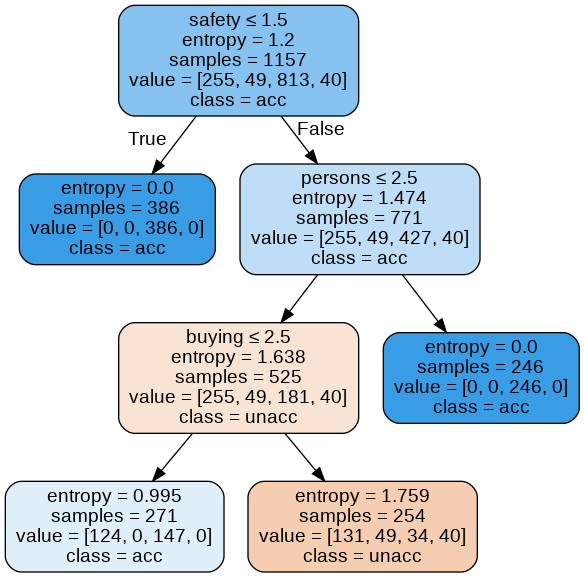

In [ ]:
#Vẽ thử cây ra
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X_train.columns,class_names=list(y_train.unique()))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

#Bài tập

1. Hãy thử thay đổi Max_depth để tăng accuracy trên tập testing, vẽ cây với Max_depth đã thay đổi.
2. max_depth ảnh hưởng như thế nào đối với mô hình decision tree, vì sao?
3. Dùng dataset bên dưới, từ mô hình Decision Tree hãy code thêm mô hình Random Forest như thuật toán đã học. Thử tìm hiểu cách dùng Random Forest trong sklearn để so sánh kết quả.

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-07/bt2.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Đây là data dự đoán một người có bị bênh tiểu đường hay không

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[data.columns.difference(["Outcome"])], data["Outcome"], test_size=0.3, random_state=1) # 70% training and 30% test
